In [1]:
import numpy as np
from scipy.sparse.linalg import eigsh # eign values/vectors of symmetric square or hermitian matrix
from scipy.sparse.linalg import eigs  # eign values/vectors of square matrix 
import matplotlib.pyplot as plt 
from scipy import sparse


Eigenstates of the Schrodinger equation satisfy $H\psi = E\psi$ where $H$ is the Hamiltonian operator, and $E$ and $\psi$ represent the eigenvalues/eigenstates. The Hamiltonian Operator in 2D is

$$H = -\frac{1}{2m}\left( \frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2}\right) + V(x,y)$$

If we discretize $\psi$ into a vector (spacing $\Delta x$), the equation $H\psi = E\psi$ can be arranged and rewritten in 2 dimensions as

$$\left[-\frac{1}{2}(D \oplus D) + m\Delta x^2 V \right] \psi = \left(m \Delta x^2 E\right) \psi$$

where

* $\psi$ is a vector of length $N^2$ where $N$ is the number of discretized points in $x$ and $y$
* $D$ is an $N \times N$ matrix
* $D \oplus D$ is a tridiagonal $N^2 \times N^2$ matrix with -2 on the main diagonal and 1 on the two neighbouring diagonals. $\oplus$ represents the Kronecker sum of two matrices.
* $V$ is a diagonal $N^2 \times N^2$ matrix with each entry on the diagonal representative of the potential at that particular coordinate.

In [2]:
# create mesh of x,y coordinates 
N = 400
X,Y = np.meshgrid(np.linspace(0,1,N),np.linspace(0,1,N))

In [3]:
# define the potential (2D)
def get_potential(x,y):
    return np.exp(-(x-0.3)**2/(2*0.1**2)) * np.exp(-(y-0.3)**2/(2*0.1**2))
    
V = get_potential(X,Y)

In [4]:
# define the Hamiltonian in 2D 
diag = np.ones(N)
diags = np.array([diag,-2*diag,diag])               # define diagonal and two off disgonal matrix elements (one up and another down to the main diaginal)
D = sparse.spdiags(diags,np.array([-1,0,1]))        # define D matrix (note this is sparse matrix-> has lot of zeros)
T = -1/2*sparse.kronsum(D,D)                        # KE
U = sparse.diags(V.reshape(N**2))
H = T + U

In [5]:
# solve for the eign values and vectors 
u,v = eigsh(H,k=10,which='SM')

In [6]:
u # eign values 

array([0.00017444, 0.00028268, 0.00033364, 0.00042988, 0.00048732,
       0.00062246, 0.00067294, 0.00082771, 0.00088383, 0.00094814])

In [7]:
# first eign vector and reshaping it back to N*N dim 
v.T[0].reshape(N,N)

array([[-1.94650747e-18, -4.98882353e-18, -3.39236991e-18, ...,
        -7.59867802e-07, -5.06772436e-07, -2.53444400e-07],
       [-3.07978321e-18, -5.12005626e-18, -5.05027414e-18, ...,
        -1.51981937e-06, -1.01360074e-06, -5.06916744e-07],
       [-3.10407178e-18, -2.54750696e-18, -5.90985798e-18, ...,
        -2.27993848e-06, -1.52054081e-06, -7.60444985e-07],
       ...,
       [-7.59867802e-07, -1.51981937e-06, -2.27993848e-06, ...,
        -1.29336613e-05, -8.62369458e-06, -4.31222344e-06],
       [-5.06772436e-07, -1.01360074e-06, -1.52054081e-06, ...,
        -8.62369458e-06, -5.74996558e-06, -2.87523358e-06],
       [-2.53444400e-07, -5.06916744e-07, -7.60444985e-07, ...,
        -4.31222344e-06, -2.87523358e-06, -1.43774219e-06]])

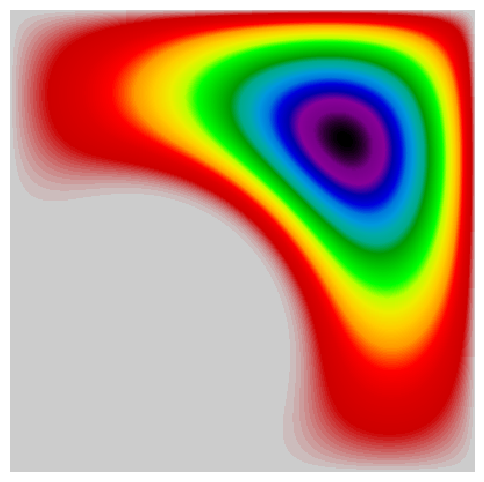

In [8]:
# plot the fist eign vector 
plt.figure(figsize=(6,6))
plt.pcolormesh(X, Y, v.T[0].reshape(N,N), cmap='nipy_spectral')
plt.axis('off')
plt.show()